In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your CSV dataset
df = pd.read_csv("gig_worker_clean_dataset.csv")

# Split features and target
X = df.drop(columns=["Impact_on_FTE", "Worker_ID"])
y = df["Impact_on_FTE"]

# Define column types
categorical_cols = ["Gender", "Education_Level", "Gig_Platform"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_cols) # Replace sparse=False with handle_unknown='ignore' to handle unseen values during prediction.
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# -------------------
# Model 1: XGBoost
# -------------------
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# Hyperparameter tuning (small grid for speed)
xgb_params = {
    "classifier__n_estimators": [100, 150],
    "classifier__max_depth": [3, 5],
    "classifier__learning_rate": [0.05, 0.1]
}

xgb_grid = GridSearchCV(xgb_pipeline, param_grid=xgb_params, cv=3, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Best XGB results
print("Best XGB Parameters:", xgb_grid.best_params_)
y_pred_xgb = xgb_grid.predict(X_test)
print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# -------------------
# Model 2: Random Forest
# -------------------
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# RF tuning
rf_params = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 15],
    "classifier__min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=3, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best RF results
print("Best RF Parameters:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}
XGB Accuracy: 0.971
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2000
           1       0.96      0.99      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

Best RF Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
RF Accuracy: 0.97025
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2000
           1       0.96      0.98      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



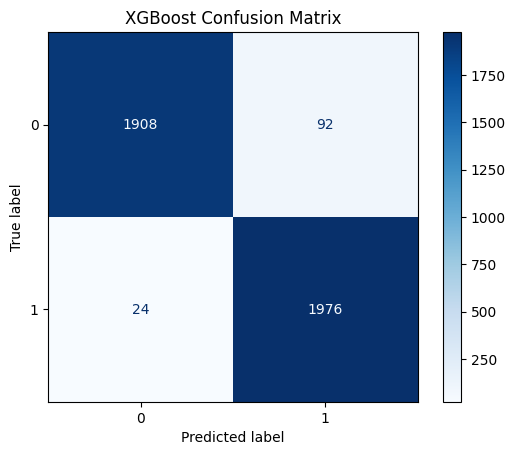

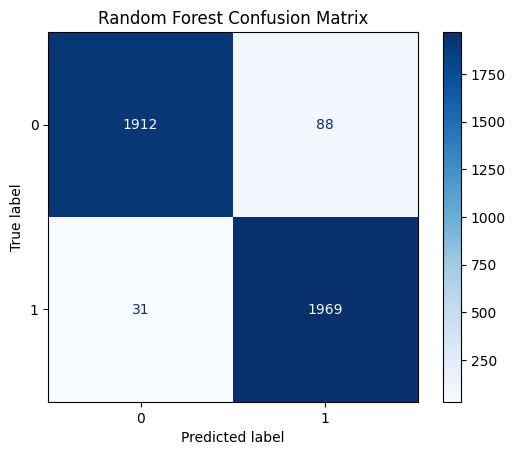

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(title)
    plt.show()

# Plot for XGBoost
plot_confusion(y_test, y_pred_xgb, title="XGBoost Confusion Matrix")

# Plot for Random Forest
plot_confusion(y_test, y_pred_rf, title="Random Forest Confusion Matrix")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:
 {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1974
           1       0.93      0.91      0.92      2026

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



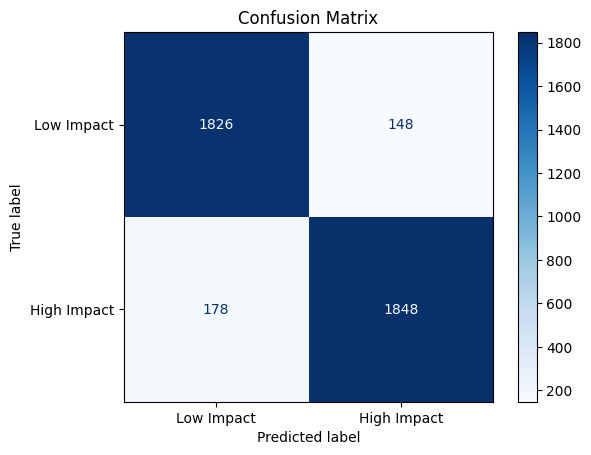

<ipython-input-18-c71da8ee5fcc>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")


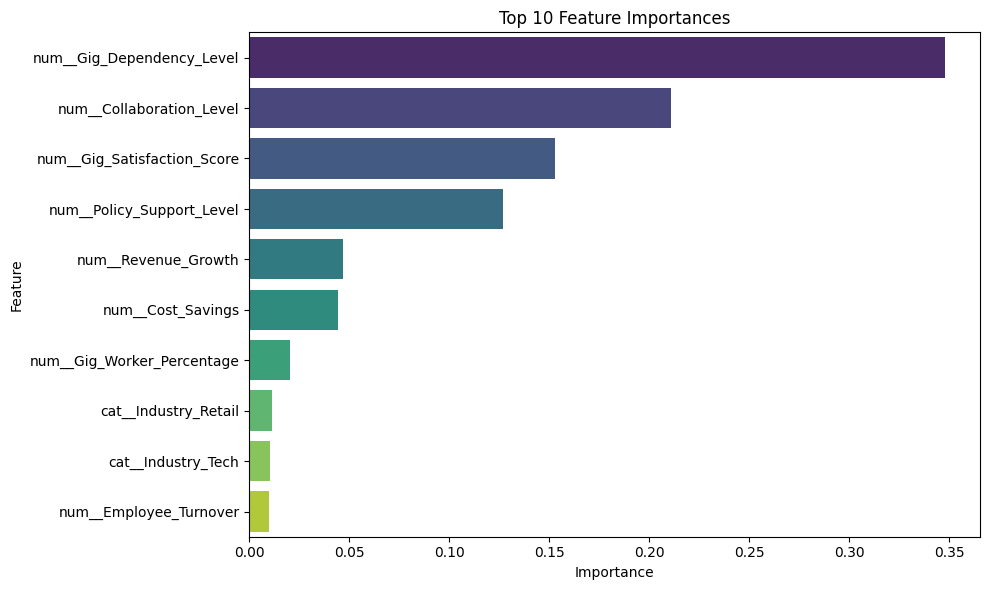

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== XGB Results =====
Best Parameters:
 {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1974
           1       0.93      0.91      0.92      2026

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



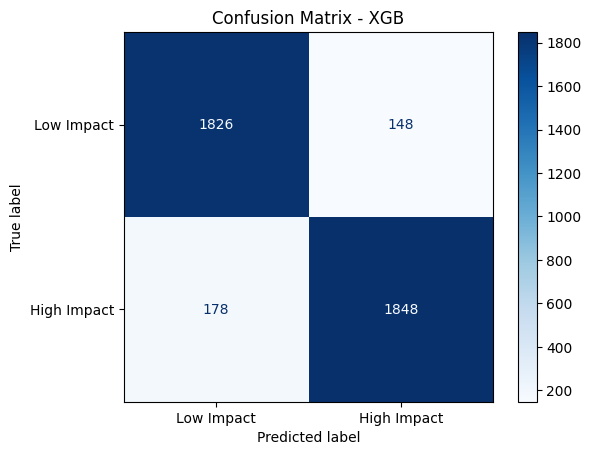


===== RF Results =====
Best Parameters:
 {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1974
           1       0.91      0.90      0.91      2026

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



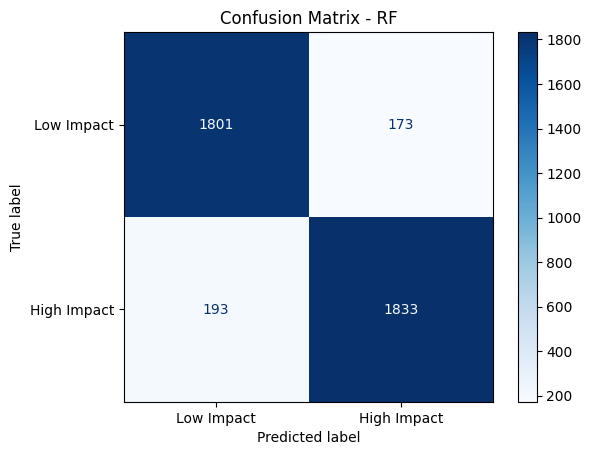

<ipython-input-18-c71da8ee5fcc>:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")


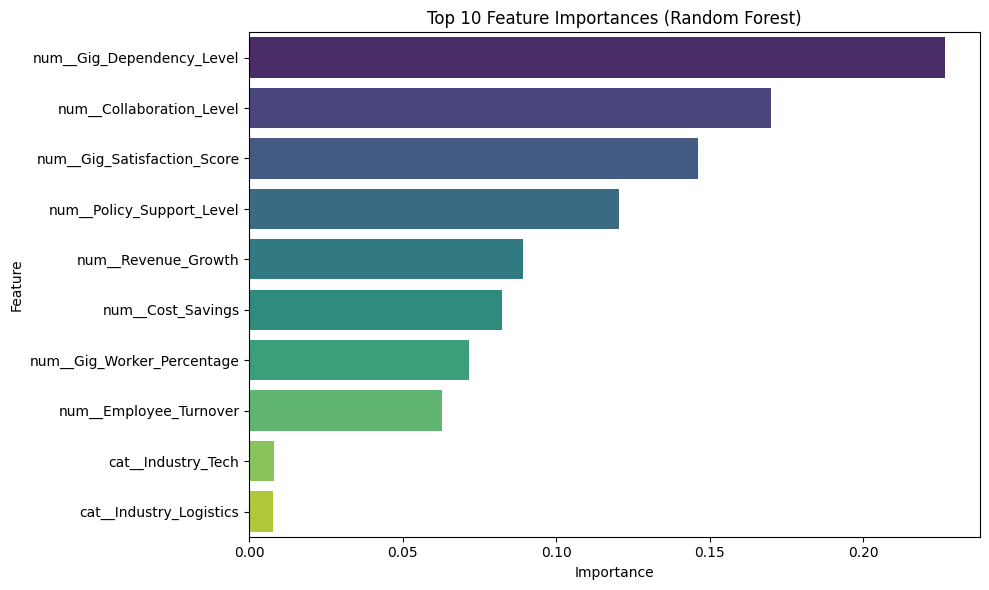

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("company_impact_dataset_balanced.csv")

# Features and target
X = df.drop("Impact_on_Company", axis=1)
y = df["Impact_on_Company"]

# Preprocessing
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ))
])

# Hyperparameter tuning
params = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1]
}

grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print("Best Parameters:\n", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Impact", "High Impact"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
clf = best_model.named_steps["classifier"]
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
importances = clf.feature_importances_

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("company_impact_dataset_balanced.csv")

# Features and target
X = df.drop("Impact_on_Company", axis=1)
y = df["Impact_on_Company"]

# Preprocessing
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Define models
models = {
    'XGB': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'RF': RandomForestClassifier(random_state=42)
}

# Hyperparameter tuning
params = {
    'XGB': {
        'classifier__n_estimators': [100],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.05, 0.1]
    },
    'RF': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5]
    }
}

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate both models
best_models = {}

for name, clf in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    grid = GridSearchCV(pipeline, params[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    y_pred = best_models[name].predict(X_test)

    print(f"\n===== {name} Results =====")
    print("Best Parameters:\n", grid.best_params_)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Impact", "High Impact"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Feature Importance (for Random Forest)
rf_clf = best_models["RF"].named_steps["classifier"]
feature_names = best_models["RF"].named_steps["preprocessor"].get_feature_names_out()
importances = rf_clf.feature_importances_

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance for RF
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
#!pip install shap statsmodels pingouin


HYPOTHESIS TESTING

IMPACT ON FULL TIME WORKERS

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df_fte = pd.read_csv("gig_worker_clean_dataset.csv")


In [ ]:
# Features to test
features = ['Job_Satisfaction', 'Mental_Health_Score', 'Workplace_Support',
            'Job_Security', 'Career_Growth_Opportunities']

# Separate groups
impacted = df_fte[df_fte['Impact_on_FTE'] == 1]
not_impacted = df_fte[df_fte['Impact_on_FTE'] == 0]

# Run t-tests
for feature in features:
    t_stat, p_val = ttest_ind(impacted[feature], not_impacted[feature])
    print(f"{feature}: t-stat={t_stat:.3f}, p-value={p_val:.5f}")


Job_Satisfaction: t-stat=121.540, p-value=0.00000
Mental_Health_Score: t-stat=38.954, p-value=0.00000
Workplace_Support: t-stat=160.235, p-value=0.00000
Job_Security: t-stat=104.610, p-value=0.00000
Career_Growth_Opportunities: t-stat=128.138, p-value=0.00000


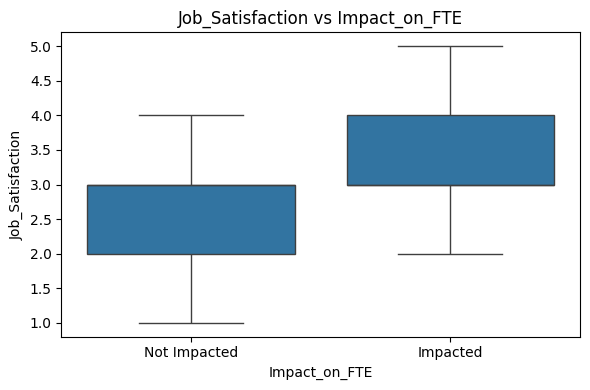

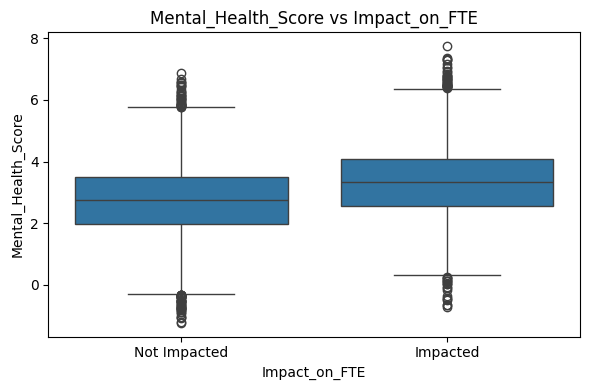

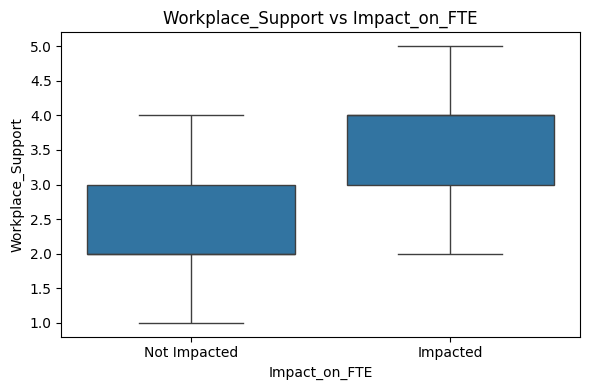

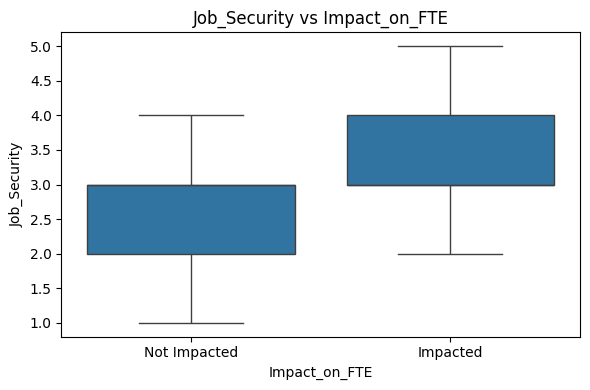

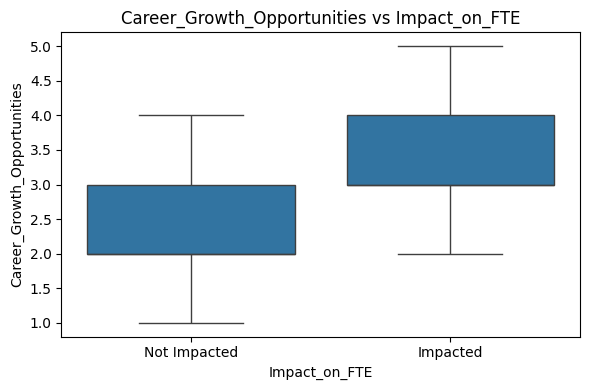

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Impact_on_FTE", y=feature, data=df_fte)
    plt.title(f"{feature} vs Impact_on_FTE")
    plt.xticks([0, 1], ['Not Impacted', 'Impacted'])
    plt.tight_layout()
    plt.show()


IMPACT ON COMPANY

Revenue_Growth: t-stat=32.718, p-value=0.00000
Cost_Savings: t-stat=30.987, p-value=0.00000
Employee_Turnover: t-stat=-6.411, p-value=0.00000


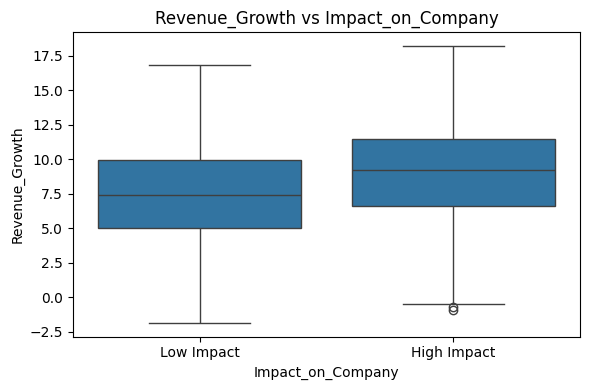

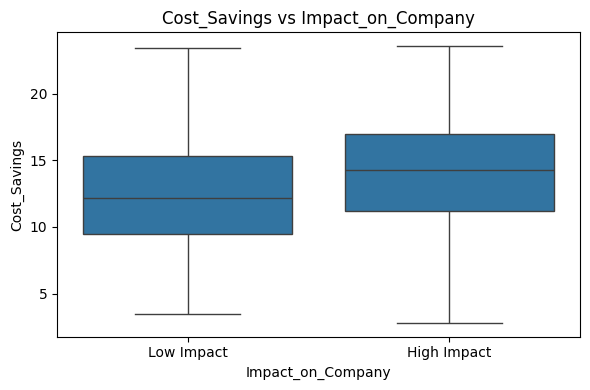

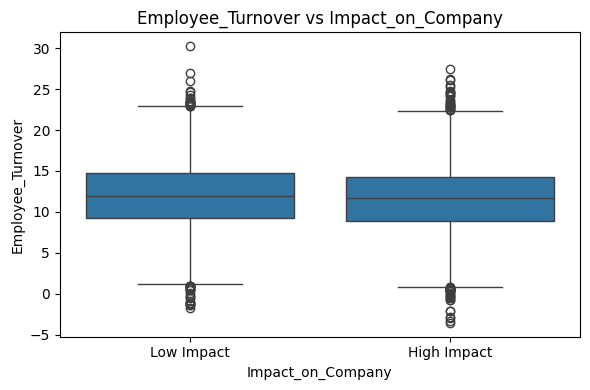

In [ ]:
df_company = pd.read_csv("company_impact_dataset_balanced.csv")
features = ['Revenue_Growth', 'Cost_Savings', 'Employee_Turnover']

# Grouped by Impact on Company
impact_yes = df_company[df_company["Impact_on_Company"] == 1]
impact_no = df_company[df_company["Impact_on_Company"] == 0]

# Run t-tests
for feature in features:
    t_stat, p_val = ttest_ind(impact_yes[feature], impact_no[feature])
    print(f"{feature}: t-stat={t_stat:.3f}, p-value={p_val:.5f}")
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Impact_on_Company", y=feature, data=df_company)
    plt.title(f"{feature} vs Impact_on_Company")
    plt.xticks([0, 1], ['Low Impact', 'High Impact'])
    plt.tight_layout()
    plt.show()


MEDIATION ANALYSIS

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation

# Load the correct dataset
df_fte = pd.read_csv("gig_worker_clean_dataset.csv")  # Adjust path if needed

# Define variables for mediation
X = df_fte['Impact_on_FTE']
M = df_fte['Hours_Per_Week']  # <-- New Mediator
Y = df_fte['Job_Satisfaction']

# Step 1: Mediator model (M ~ X)
med_model = sm.OLS(M, sm.add_constant(X))  # Don't call .fit() here

# Step 2: Outcome model (Y ~ X + M)
out_model = sm.OLS(Y, sm.add_constant(pd.concat([X, M], axis=1)))  # Don't call .fit() here

# Step 3: Mediation analysis
med = Mediation(out_model, med_model, exposure='Impact_on_FTE', mediator='Hours_Per_Week')
med_summary = med.fit()
print(med_summary.summary())


                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.000073       -0.000134        0.000374    0.514
ACME (treated)            0.000073       -0.000134        0.000374    0.514
ADE (control)             0.889642        0.875751        0.904124    0.000
ADE (treated)             0.889642        0.875751        0.904124    0.000
Total effect              0.889715        0.875885        0.904224    0.000
Prop. mediated (control)  0.000055       -0.000152        0.000420    0.514
Prop. mediated (treated)  0.000055       -0.000152        0.000420    0.514
ACME (average)            0.000073       -0.000134        0.000374    0.514
ADE (average)             0.889642        0.875751        0.904124    0.000
Prop. mediated (average)  0.000055       -0.000152        0.000420    0.514


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.mediation import Mediation

# Fit the mediator model (Impact on Company as the mediator)
mediator_model = smf.ols('Impact_on_Company ~ Gig_Worker_Percentage + Gig_Dependency_Level + Gig_Satisfaction_Score + Policy_Support_Level + Collaboration_Level', data=df)
# Fit the outcome model (Revenue Growth as the outcome variable)
outcome_model = smf.ols('Revenue_Growth ~ Impact_on_Company + Gig_Worker_Percentage + Gig_Dependency_Level + Gig_Satisfaction_Score + Policy_Support_Level + Collaboration_Level', data=df)


# Perform mediation analysis
# Pass the fitted models instead of the result objects.
mediation = Mediation(outcome_model, mediator_model, exposure='Gig_Worker_Percentage', mediator='Impact_on_Company')
mediation_result = mediation.fit()

# Display results
print(mediation_result.summary())

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.001412       -0.001300        0.004244    0.324
ACME (treated)            0.001412       -0.001300        0.004244    0.324
ADE (control)             0.099810        0.099068        0.100525    0.000
ADE (treated)             0.099810        0.099068        0.100525    0.000
Total effect              0.101222        0.098444        0.104182    0.000
Prop. mediated (control)  0.013525       -0.013235        0.040862    0.324
Prop. mediated (treated)  0.013525       -0.013235        0.040862    0.324
ACME (average)            0.001412       -0.001300        0.004244    0.324
ADE (average)             0.099810        0.099068        0.100525    0.000
Prop. mediated (average)  0.013525       -0.013235        0.040862    0.324


MODERATION ANALYSIS

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Load your dataset
df_fte = pd.read_csv("gig_worker_clean_dataset.csv")

# Create interaction term
df_fte["Interaction"] = df_fte["Impact_on_FTE"] * df_fte["Job_Security"]

# Run moderation model
model = smf.ols("Job_Satisfaction ~ Impact_on_FTE + Job_Security + Interaction", data=df_fte).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Job_Satisfaction   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     4924.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:30:02   Log-Likelihood:                -15194.
No. Observations:               20000   AIC:                         3.040e+04
Df Residuals:                   19996   BIC:                         3.043e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5131      0.025    101.023

                            OLS Regression Results                            
Dep. Variable:         Revenue_Growth   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5782.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:30:02   Log-Likelihood:                -36535.
No. Observations:               20000   AIC:                         7.310e+04
Df Residuals:                   19986   BIC:                         7.321e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

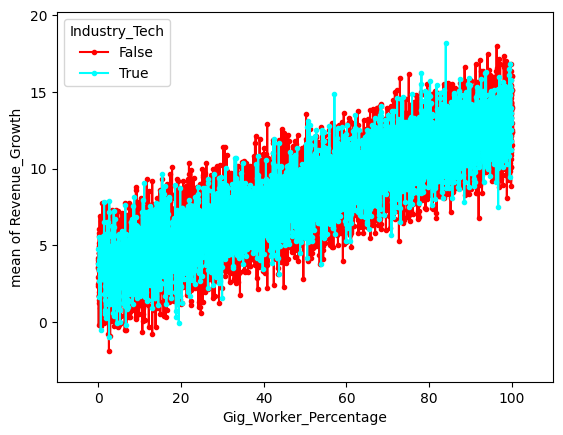

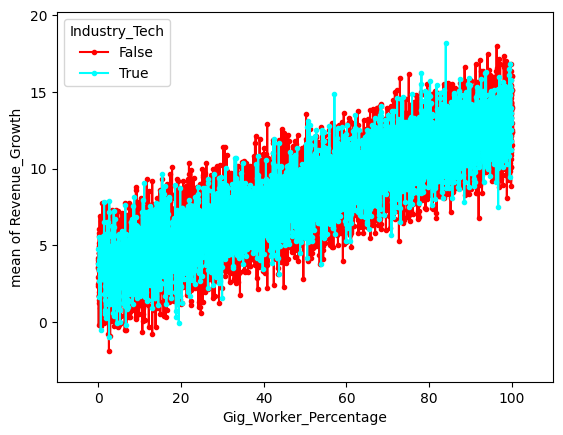

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
import pandas as pd

# Reload the original dataset
df = pd.read_csv("company_impact_dataset_balanced.csv")  # Reload to ensure 'Industry' column is present

# Convert categorical variable (Industry) into dummy variables, specifying all categories
# to be included to avoid dropping 'Industry_Finance'
df = pd.get_dummies(df, columns=['Industry'], drop_first=False)

# Fit the moderation model with interaction term between Gig Worker Percentage and Industry
# Update formula to include all industry dummy variables if needed
moderation_model = smf.ols('Revenue_Growth ~ Gig_Worker_Percentage * Industry_Tech + Gig_Worker_Percentage * Industry_Logistics + Gig_Worker_Percentage * Industry_Healthcare + Gig_Worker_Percentage * Industry_Retail + Gig_Worker_Percentage * Industry_Finance + Gig_Dependency_Level + Gig_Satisfaction_Score + Policy_Support_Level + Collaboration_Level', data=df).fit()

# Display model summary
print(moderation_model.summary())

# Plot interaction effect between Gig Worker Percentage and Industry (e.g., Tech)
interaction_plot(df['Gig_Worker_Percentage'], df['Industry_Tech'], df['Revenue_Growth'])

ANOVA

In [ ]:
import scipy.stats as stats

# Load the correct dataset
df_fte = pd.read_csv("gig_worker_clean_dataset.csv")

# Example: Job Satisfaction by Gig Platform
groups = [group["Job_Satisfaction"].values for name, group in df_fte.groupby("Gig_Platform")]  # Use df_fte here
f_stat, p_value = stats.f_oneway(*groups)
print("Gig Platform ANOVA → F-stat:", f_stat, "p-value:", p_value)

# Example: Job Satisfaction by Education Level
groups = [group["Job_Satisfaction"].values for name, group in df_fte.groupby("Education_Level")]  # Use df_fte here
f_stat, p_value = stats.f_oneway(*groups)
print("Education Level ANOVA → F-stat:", f_stat, "p-value:", p_value)

Gig Platform ANOVA → F-stat: 2.7837192434244225 p-value: 0.02511633326250175
Education Level ANOVA → F-stat: 0.9297284424726223 p-value: 0.4253039121107903


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load your dataset
df = pd.read_csv('company_impact_dataset_balanced.csv')

# Perform ANOVA to test the differences in Revenue Growth across Industry categories
model = ols('Revenue_Growth ~ C(Industry)', data=df).fit()  # C(Industry) indicates Industry as a categorical variable
anova_results = anova_lm(model)

# Display the results
print(anova_results)


                  df         sum_sq    mean_sq         F    PR(>F)
C(Industry)      4.0      32.408792   8.102198  0.752702  0.556031
Residual     19995.0  215229.183243  10.764150       NaN       NaN


SHAP ANALYSIS

<ipython-input-17-6211f7f3c308>:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features=X_preprocessed, feature_names=best_model.named_steps["preprocessor"].get_feature_names_out())


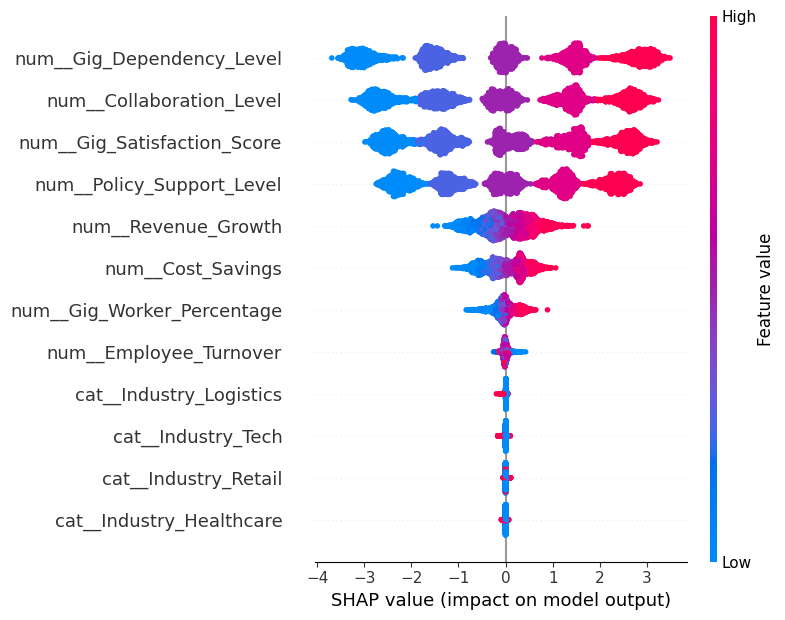

In [ ]:
import shap

# Extract the model and data
model = best_model.named_steps["classifier"]
X_preprocessed = best_model.named_steps["preprocessor"].transform(X_test)

# SHAP Explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_preprocessed)

# SHAP Summary Plot
shap.summary_plot(shap_values, features=X_preprocessed, feature_names=best_model.named_steps["preprocessor"].get_feature_names_out())
